In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import mean_squared_error

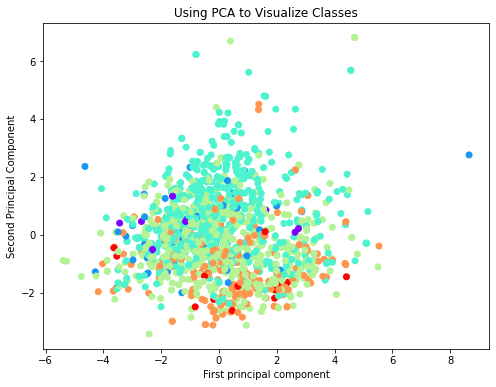

In [2]:
#PCA to visualize data Multiclass
data = pd.read_csv("C:/ProgramData/winequality-red11.csv")
data.head()
df_pca = data.copy()
X_pca = df_pca.loc[:, 'fixed acidity':'alcohol']
y_pca = df_pca['quality']
X_pca.tail()
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
X_pca.shape
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

               Predictor       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374


<AxesSubplot:>

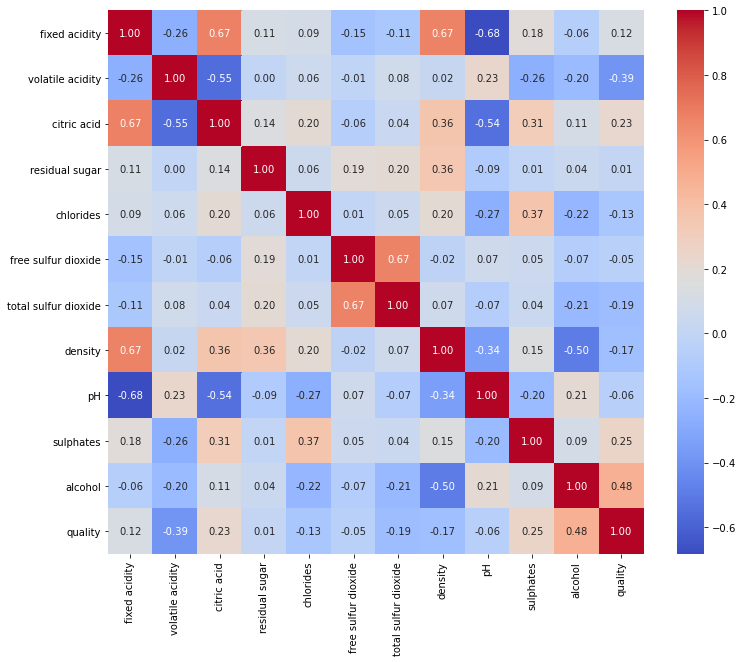

In [2]:
#correlation matrix with F-value Multiclass
import seaborn as sns
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
bestFeatures = SelectKBest(score_func=f_classif, k=11)
bestFeatures = SelectKBest(score_func=f_classif, k=11)
bestFeaturesFit = bestFeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)
dfcolumns = pd.DataFrame(X_f.columns)
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']
print(predScores.nlargest(11,'Score'))

selectedDf = data.drop('density', 1)
selectedDf = selectedDf.drop('pH', 1)

selX = selectedDf.loc[:, 'fixed acidity':'alcohol']
selY = selectedDf['quality']


plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [ ]:
#Gridsearch with feature selection in Randomforest

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',RandomForestClassifier(random_state=417))
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11] , 'model__n_estimators':np.arange(10,300,10), 'model__max_depth':np.arange(1,50,5),'model__max_features':[3,4,5,6],'model__criterion':['gini','entropy']},
    scoring='accuracy',
    n_jobs=-1,
    cv=6,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

In [3]:
# test Randomforest with hyperparamenter and feature selection from Gridsearch Multiclass
X= data.drop(['quality','pH','residual sugar','free sulfur dioxide','chlorides'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(n_estimators=170,max_depth=11,random_state=417,criterion='entropy',max_features=3)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.6979166666666666
0.9946380697050938
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.76      0.79      0.77       218
           6       0.62      0.74      0.68       188
           7       0.83      0.44      0.57        55
           8       0.00      0.00      0.00         3

    accuracy                           0.70       480
   macro avg       0.37      0.33      0.34       480
weighted avg       0.68      0.70      0.68       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
#test Randomforest without tuning any hyperparameter

X= data.drop(['quality'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(random_state=417,criterion='entropy',max_features=3)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.6770833333333334
1.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.74      0.78      0.76       218
           6       0.61      0.70      0.65       188
           7       0.68      0.42      0.52        55
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.34      0.32      0.32       480
weighted avg       0.65      0.68      0.66       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
#Gridsearch without feature selection in Randomforest

X_f = data.loc[:, 'fixed acidity':'alcohol']
X_f= StandardScaler().fit_transform(X_f)
y_f = data['quality']
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(random_state=417)
parameters={'n_estimators':np.arange(10,300,10), 'max_depth':np.arange(1,50,5),'max_features':[3,4,5,6],'criterion':['gini','entropy']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
grid_search=GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result=grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 2320 candidates, totalling 11600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

Best: 0.672025 using {'criterion': 'gini', 'max_depth': 16, 'max_features': 3, 'n_estimators': 130}


In [85]:
#test Randomforest with hyparamenter from Gridsearch but without feature selection

X= data.drop(['quality'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(n_estimators=130,max_depth=16,random_state=417,criterion='gini',max_features=3)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.68125
1.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.75      0.77      0.76       218
           6       0.61      0.73      0.67       188
           7       0.73      0.40      0.52        55
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.35      0.32      0.32       480
weighted avg       0.66      0.68      0.66       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Gridsearch with feature selection in KNN 

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',KNeighborsClassifier())]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11] , 'model__n_neighbors': [3,4,5,6,7,8,9,10],'model__weights':['uniform', 'distance'],'model__algorithm':['auto','ball_tree', 'kd_tree', 'brute']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.3s


{'model__algorithm': 'auto', 'model__n_neighbors': 9, 'model__weights': 'distance', 'selector__k': 8}
0.6478819666880206


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    5.6s finished


In [34]:
##Gridsearch without feature selection in KNN
X_f = data.loc[:, 'fixed acidity':'alcohol']
X_f = StandardScaler().fit_transform(X_f)
y_f = data['quality']
model = KNeighborsClassifier()
parameters = {'n_neighbors': [3,4,5,6,7,8,9,10],'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree', 'kd_tree', 'brute']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
grid_search = GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result = grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


Best: 0.643410 using {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.1s finished


In [36]:
# test KNN with hyperparamenter and feature selection from Gridsearch

X= data.drop(['quality','pH','residual sugar','free sulfur dioxide',], axis=1)
#dropped 3 features because grid search chose 8 features. Dropped features are ones with lowest F scores. 
#This methodology was used in future models that fit from grid search results where k_best was <11
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='auto')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.68125
1.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.07      0.12        14
           5       0.77      0.75      0.76       218
           6       0.62      0.72      0.67       188
           7       0.57      0.49      0.53        55
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.41      0.34      0.35       480
weighted avg       0.67      0.68      0.67       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# test KNN with hyperparamenter but without feature selection from Gridsearch
X = data.drop(['quality'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='auto')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.6583333333333333
1.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.75      0.72      0.74       218
           6       0.59      0.70      0.64       188
           7       0.56      0.49      0.52        55
           8       0.00      0.00      0.00         3

    accuracy                           0.66       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.66      0.65       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# test KNN without tuning any hyperparameter
X = data.drop(['quality'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF =KNeighborsClassifier()
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.6
0.6925826630920465
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.07      0.11        14
           5       0.68      0.67      0.67       218
           6       0.55      0.64      0.59       188
           7       0.53      0.38      0.44        55
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.33      0.29      0.30       480
weighted avg       0.59      0.60      0.59       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#Gridsearch with feature selection in ANN

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000))
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11],'model__hidden_layer_sizes':np.arange(80,200,5),'model__activation':['tanh','logistic','identity']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
#print(X_f )
X_f = StandardScaler().fit_transform(X_f)
#print(X_f )
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
search.fit(selX_train,selY_train)
a = search.best_params_
b = search.best_score_ 
print(a)
print(b)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 23.4min finished


{'model__activation': 'logistic', 'model__hidden_layer_sizes': 145, 'selector__k': 7}
0.638949391415759


In [100]:
#Gridsearch without feature selection for ANN
X_f = data.loc[:, 'fixed acidity':'alcohol']
X_f = StandardScaler().fit_transform(X_f)
y_f = data['quality']
model = MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000)
parameters = {'hidden_layer_sizes':np.arange(80,200,5),'activation':['tanh','logistic','identity']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
grid_search = GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result = grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.7min finished


Best: 0.635410 using {'activation': 'logistic', 'hidden_layer_sizes': 160}


In [17]:
#test ANN without tuning any hyperparameter
#test ANN with hyperparamenter and feature selection from Gridsearch
#test ANN with hyparamenter from Gridsearch but without feature selection
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
clf = MLPClassifier(random_state=417 ).fit(selX_train, selY_train)
a = clf.score(selX_test, selY_test)
print(a)
X_f = data.drop(['pH','residual sugar','free sulfur dioxide','chlorides','quality',], axis=1)
y_f = data['quality']
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
clf = MLPClassifier(hidden_layer_sizes=145,random_state=417,activation='logistic',max_iter=5000,learning_rate_init=0.01).fit(selX_train, selY_train)
b = clf.score(selX_test, selY_test)
print(b)
data = pd.read_csv("C:/ProgramData/winequality-red11.csv")
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
clf = MLPClassifier(hidden_layer_sizes=160,random_state=417,activation='logistic',max_iter=5000,learning_rate_init=0.01 ).fit(selX_train, selY_train)
c = clf.score(selX_test, selY_test)
print(c)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5708333333333333
0.64375
0.6229166666666667


In [5]:
# Gridsearch with feature selection in Logisticregression 
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',LogisticRegression(max_iter=5000,random_state=417))]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11] , 'model__penalty': ['l1', 'l2'], 'model__solver':['lbfgs', 'liblinear','saga']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    6.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.6s finished


{'model__penalty': 'l1', 'model__solver': 'saga', 'selector__k': 11}
0.5898062139654068


In [96]:
# test Logisticregressoion with hyperparamenter and feature selection from Gridsearch
X= data.drop(['quality'], axis=1)
y = data['quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF =LogisticRegression(max_iter=5000,penalty='l1',solver='saga',random_state=417)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.5979166666666667
0.6193029490616622
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.66      0.74      0.70       218
           6       0.52      0.59      0.56       188
           7       0.62      0.27      0.38        55
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.30      0.27      0.27       480
weighted avg       0.58      0.60      0.58       480



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#Gridsearch without feature selection in Logisticregression

X_f = data.loc[:, 'fixed acidity':'alcohol']
X_f= StandardScaler().fit_transform(X_f)
y_f = data['quality']
model =LogisticRegression(random_state=417,max_iter=5000)
parameters={'penalty': ['l1', 'l2'], 'solver':['lbfgs', 'liblinear','saga']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
grid_search=GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result=grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


Best: 0.589806 using {'penalty': 'l1', 'solver': 'saga'}


In [43]:
#Data import and preprocessing: NOW WE START BINARY CLASSIFICATION
data = pd.read_csv("C:/ProgramData/winequality-red11.csv")
data['Quality'] = pd.cut(x=data['quality'], bins=[2,5,8], labels=[0,1])
data.drop(['quality'], axis=1)
data['Quality']=np.asarray(data['Quality'])
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


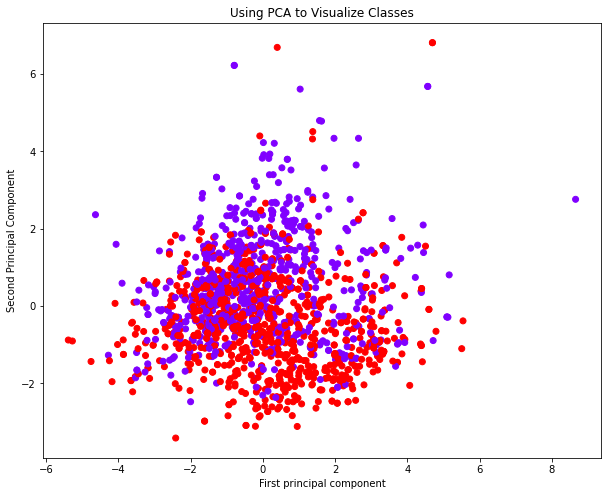

In [45]:
#PCA
from sklearn.decomposition import PCA
df_pca = data.copy()
X_pca = df_pca.loc[:, 'fixed acidity':'alcohol']
y_pca = df_pca['Quality']
X_pca.tail()
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
X_pca.shape

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

               Predictor       Score
10               alcohol  372.194765
1       volatile acidity  184.022796
6   total sulfur dioxide   90.816016
9              sulphates   79.737680
2            citric acid   41.490123
7                density   41.479723
4              chlorides   19.378659
0          fixed acidity   14.573088
5    free sulfur dioxide    6.114110
8                     pH    0.017014
3         residual sugar    0.007454


<AxesSubplot:>

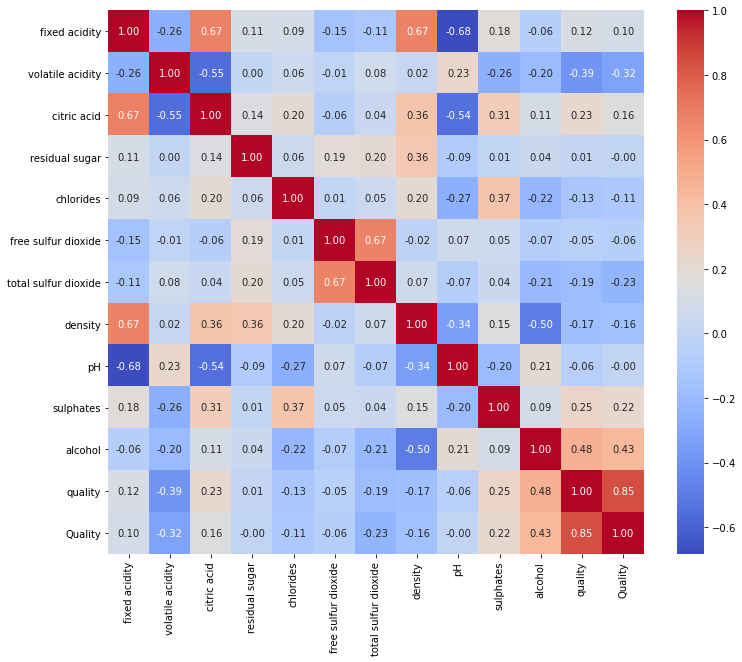

In [46]:
#Correlation Heat Map
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
bestFeatures = SelectKBest(score_func=f_classif, k=11)
bestFeatures = SelectKBest(score_func=f_classif, k=11)
bestFeaturesFit = bestFeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)
dfcolumns = pd.DataFrame(X_f.columns)
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']
print(predScores.nlargest(11,'Score'))

selectedDf = data.drop('density', 1)
#selectedDf = selectedDf.drop('pH', 1)

selX = selectedDf.loc[:, 'fixed acidity':'alcohol']
selY = selectedDf['Quality']

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [16]:
#test Randomforest without tuning any hyperparameter for binary Label
X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(random_state=417)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.79375
1.0
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       234
           1       0.80      0.80      0.80       246

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



In [18]:
#Gridsearch with feature selection in Randomforest for binary labels

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',RandomForestClassifier())
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11] , 'model__n_estimators':np.arange(10,200,2), 'model__max_depth':np.arange(1,50,5),'model__criterion':['gini','entropy']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)


Fitting 5 folds for each of 9500 candidates, totalling 47500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5768 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6504 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7632 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8616 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 9544 tasks      |

{'model__criterion': 'entropy', 'model__max_depth': 31, 'model__n_estimators': 114, 'selector__k': 10}
0.8087684176809737


In [20]:
#Gridsearch without feature selection in Randomforest for binary label

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
X_f= StandardScaler().fit_transform(X_f)
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(random_state=417)
parameters={'n_estimators':np.arange(10,200,2), 'max_depth':np.arange(1,50,5),'criterion':['gini','entropy']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
grid_search=GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result=grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 479 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1912 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4216 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5752 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6616 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 7544 tasks      | 

Best: 0.808744 using {'criterion': 'gini', 'max_depth': 11, 'n_estimators': 128}


In [21]:
#test Randomforest model with hyparamenter from Gridsearch but without feature selection for binary

X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(n_estimators=128, max_depth=11, max_features= 'auto',random_state=417,criterion='gini')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.8
0.998212689901698
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       234
           1       0.80      0.82      0.81       246

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [15]:
# test Randomforest with hyperparamenter and feature selection from Gridsearch for binary label

X = data.drop([ 'residual sugar','quality', 'Quality'], axis=1)
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = RandomForestClassifier(n_estimators=114, max_depth=31, max_features= 'auto',random_state=417,criterion='entropy')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.8041666666666667
1.0
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       234
           1       0.80      0.83      0.81       246

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [18]:
#Gridsearch with feature selection in ANN for binary label

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000))
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11],'model__hidden_layer_sizes':np.arange(80,200,5),'model__activation':['tanh','logistic','identity']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 19.6min finished


{'model__activation': 'logistic', 'model__hidden_layer_sizes': 145, 'selector__k': 8}
0.7738829276105061


In [27]:
#Gridsearch without feature selection in ANN for binary label

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
X_f= StandardScaler().fit_transform(X_f)
model =MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000)
parameters={'hidden_layer_sizes':np.arange(80,200,5),'activation':['tanh','logistic','identity']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
grid_search=GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result=grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.1min finished


Best: 0.772113 using {'activation': 'logistic', 'hidden_layer_sizes': 180}


In [29]:
# test ANN with hyperparamenter and feature selection from Gridsearch for binary label

X = data.drop(['pH','residual sugar','free sulfur dioxide','quality', 'Quality'], axis=1)
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
wineRF = MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000,activation='logistic',hidden_layer_sizes=145)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7520833333333333
1.0
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       228
           1       0.74      0.81      0.77       252

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [28]:
# test ANN with hyperparamenter and without feature selection from Gridsearch for binary label
X = data.drop(['quality', 'Quality'], axis=1)
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
wineRF = MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000,activation='logistic',hidden_layer_sizes=180)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7708333333333334
1.0
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       228
           1       0.78      0.79      0.78       252

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



In [26]:
#test ANN without tuning any hyperparameter for binary label

X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
wineRF = MLPClassifier(random_state=417,learning_rate_init=0.01,max_iter=5000)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7541666666666667
0.934763181411975
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       228
           1       0.76      0.77      0.77       252

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



In [38]:
# Gridsearch with feature selection in KNN for binary

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',KNeighborsClassifier())]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11] , 'model__n_neighbors': [3,4,5,6,7,8,9,10],'model__weights':['uniform', 'distance'],'model__algorithm':['auto','ball_tree', 'kd_tree', 'brute']},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    5.9s


{'model__algorithm': 'auto', 'model__n_neighbors': 10, 'model__weights': 'distance', 'selector__k': 8}
0.781041800128123


[Parallel(n_jobs=-1)]: Done 1561 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   10.9s finished


In [39]:
# test KNN with hyperparamenter and feature selection from Gridsearch for binary
X = data.drop(['Quality','quality','pH','residual sugar','free sulfur dioxide',], axis=1)
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='auto')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7791666666666667
1.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       234
           1       0.77      0.80      0.79       246

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



In [40]:
#Gridsearch without feature selection in KNN for binary 

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
X_f = StandardScaler().fit_transform(X_f)
model = KNeighborsClassifier()
parameters = {'n_neighbors': [3,4,5,6,7,8,9,10],'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree', 'kd_tree', 'brute']}
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=9)
grid_search=GridSearchCV(model,parameters,n_jobs=-1,cv=5,verbose=3)
grid_result=grid_search.fit(selX_train,selY_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


Best: 0.779260 using {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.4s finished


In [41]:
#test KNN with hyparamenter from Gridsearch but without feature selection for binary

X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF =KNeighborsClassifier(n_neighbors=8,weights='distance',algorithm='auto')
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7645833333333333
1.0
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       234
           1       0.75      0.82      0.78       246

    accuracy                           0.76       480
   macro avg       0.77      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480



In [42]:
#test KNN without tuning any hyperparameter for binary

X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)
wineRF =KNeighborsClassifier()
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.71875
0.7944593386952636
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       234
           1       0.70      0.80      0.74       246

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



In [14]:
#Gridsearch with feature selection in SVM for binary label

X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['Quality']
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_classif)),
     ('model',SVC(random_state=417,max_iter=5000))
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[7,8,9,10,11], 'model__kernel': ['rbf','sigmoid','poly'],'model__C': [1, 10, 100, 1000]},
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=3

    )
X_f = StandardScaler().fit_transform(X_f)
selX_train, selX_test, selY_train, selY_test = train_test_split(X_f, y_f, test_size = 0.3, random_state=10)
search.fit(selX_train,selY_train)
a=search.best_params_
b=search.best_score_ 
print(a)
print(b)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 263 tasks      | elapsed:    5.4s


{'model__C': 1, 'model__kernel': 'rbf', 'selector__k': 8}
0.7596212363869315


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.7s finished


In [13]:
# test SVM with hyperparamenter and feature selection from Gridsearch

data = pd.read_csv("C:/ProgramData/winequality-red111.csv")
X = data.drop(['quality','Quality','pH','residual sugar','free sulfur dioxide'], axis=1)
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
wineRF = SVC(random_state=417,max_iter=5000,kernel='rbf',C=1)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       252

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [12]:
#test SVM without tuning any hyperparameter

data = pd.read_csv("C:/ProgramData/winequality-red111.csv")
X = data.loc[:, 'fixed acidity':'alcohol']
y = data['Quality']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
wineRF = SVC(random_state=417)
wineRF.fit(X_train, y_train)
y_pred = wineRF.predict(X_test)
print(wineRF.score(X_test,y_test))
print(wineRF.score(X_train,y_train))
clas = classification_report(y_test, y_pred)
print(clas)

0.7666666666666667
0.805183199285076
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       228
           1       0.77      0.79      0.78       252

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



In [ ]:
#import the dataset which stored in local
import xlrd
import numpy as np
Concre_data_file = xlrd.open_workbook(R"C:\Users\Administrator\Desktop\Concrete_Data.xls")

#clean the data and transform it to a regular dataset, which every row represents an instant, and the last col stores the target value
concrete = Concre_data_file.sheet_by_index(0)
data = []
for i in range(1,concrete.nrows):
    data.append([])
    for j in range(concrete.ncols):
        data[i-1].append(concrete.cell_value(i,j))
        #store the data in array, which is convient to operate
data = np.array(data)
X = data[:,0:9]
Y = data[:,9].reshape(-1,1)
X_train_m = X[0:900,:]
Y_train_m = Y[0:900]
print(np.shape(Y))
def lnr(X,y,a_current,itaritaion=1000,leanringrate=0.0000000001):
    for i in range(itaritaion):
        cost=1/1030*((y-X.dot(a_current)).T).dot(y-X.dot(a_current))
        amid=2*np.dot((X.T),X)
        amid2=-2*np.dot((X.T),y)
        a_gradient=amid2+amid.dot(a_current)
        a_current=a_current-a_gradient*leanringrate
        
    return a_current,cost
re=(lnr(X_train_m,Y_train_m ,a_current=0.1*np.ones((9,1))))
ytest=Y[900:1030,:]
Xtest=X[900:1030,:]
cost1=1/130*((ytest-Xtest.dot(re[0])).T).dot(ytest-Xtest.dot(re[0]))
print(re)
print(cost1)


In [ ]:
#import the dataset which stored in local
import xlrd
import numpy as np
Concre_data_file = xlrd.open_workbook(R"C:\Users\Administrator\Desktop\123.xls")

#clean the data and transform it to a regular dataset, which every row represents an instant, and the last col stores the target value
concrete = Concre_data_file.sheet_by_index(0)
data = []
for i in range(1,concrete.nrows):
    data.append([])
    for j in range(concrete.ncols):
        data[i-1].append(concrete.cell_value(i,j))
        #store the data in array, which is convient to operate
data = np.array(data)
data=np.insert(data,0,1)
print(data)
X = data[:,:2]
Y = data[:,9].reshape(-1,1)
X_train_m = X[0:900,:]
Y_train_m = Y[0:900,:]
print(Y)
def lnr(X,y,a_current,itaritaion=1000,leanringrate=0.0000000001):
    for i in range(itaritaion):
        cost=1/1030*((y-X.dot(a_current)).T).dot(y-X.dot(a_current))
        amid=2*np.dot((X.T),X)
        amid2=-2*np.dot((X.T),y)
        a_gradient=amid2+amid.dot(a_current)
        a_current=a_current-a_gradient*leanringrate
        
    return a_current,cost
re=(lnr(X_train_m,Y_train_m ,a_current=0.1*np.ones((2,1))))
ytest=Y[900:1030,:]
Xtest=X[900:1030,:]
cost1=1/130*((ytest-Xtest.dot(re[0])).T).dot(ytest-Xtest.dot(re[0]))
print(re)
print(cost1)
